# Google Drive Loading
It requires to mount the directory first
Please put the data in the same directory as below to avoid probems

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets.cifar10 import load_data
from sklearn.preprocessing import OneHotEncoder

###
  # Prints and image
###
import matplotlib.pyplot as plt
def showIMG(data):
  plt.imshow(data)

(xt,yt), (xv,yv) = load_data()
enc = OneHotEncoder(categories='auto')
enc.fit(yt)

yt = enc.transform(yt).toarray()
yv = enc.transform(yv).toarray()

170500096/170498071 [==============================] - 1180s 7us/step


(50000, 32, 32, 3) (50000, 10)


50000

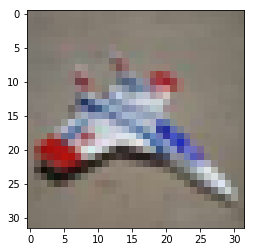

In [2]:
print(xt.shape, yt.shape)
train_items = xt.shape[0]
test_items  = xv.shape[0]
showIMG(xt[30])
len(yt)
# showIMG(xv[0])

# Task 1

## Build a CNN architecture to classify this data-set

Hint: https://www.isip.uni-luebeck.de/fileadmin/uploads/tx_wapublications/hertel_ijcnn_2015.pdf

Run for 50 epochs and report your results.


# Response
Installing colab to visualize training


In [3]:
!pip install tensorboardcolab

In [4]:
from tensorboardcolab import TensorBoardColab
tbc=TensorBoardColab()
logsPath = "./Graph"

Using TensorFlow backend.


Wait for 8 seconds...
TensorBoard link:
http://935aa5e3.ngrok.io


In [3]:
logsPath = "./Graph"

# First try
In this first atempt no data augmentation will be used, and a simple CNN will be used.
The model takes the 32x32 images as input.

In [5]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, 32, 32, 3], name="Features")
y = tf.placeholder(tf.float32, [None, 10], name="Labels")

model = tf.layers.Conv2D(64,[6,6],padding="same",activation=tf.nn.relu, name="1_Conv")(x)
model = tf.layers.MaxPooling2D((2,2), (2,2), name="1_Pool")(model)
model = tf.layers.Dropout(0.8, name="1_Dropout")(model)
model = tf.layers.Conv2D(64,[3,3],padding="same",activation=tf.nn.relu, name="2_Conv")(model)
model = tf.layers.MaxPooling2D((2,2), (2,2), name="2_Pool")(model)
model = tf.layers.Dropout(0.8, name="2_Dropout")(model)
model = tf.layers.BatchNormalization(name="batchNormalization")(model)
model = tf.layers.Flatten(name="Flatten")(model)
model = tf.layers.Dense(280, name="1_dense")(model)
model = tf.layers.Dense(10, name="2_dense")(model)

# loss
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=model))
tf.summary.histogram("Loss", cost)

# optimizer
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32), name='accuracy')
tf.summary.histogram("Accuracy", accuracy)

epochs = 50
batchSize = 1000
n_batches = train_items // batchSize
saver = tf.train.Saver()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
histT = []
histV = []
print("Begin Session")
with tf.Session() as sess:
#   if tf.gfile.Exists(logsPath+"model.ckpt"):
#     saver.restore(sess, logsPath+"model.ckpt")
#     print("Model restored!")
#   train_writer = tf.summary.FileWriter(logsPath, sess.graph)
  sess.run(tf.global_variables_initializer())
  print("Variables Initialized")
    
  counter = 0
  for epoch in range(epochs):
    print("Start Epoch {:>2}".format(epoch + 1))
    for i in range(1, n_batches + 1):
      print(".", end="")
      counter += 1
      merge = tf.summary.merge_all()
      summary, _ = sess.run([merge, optimizer],
                            feed_dict={x: xt[i*batchSize:(i+1)*batchSize],
                                       y: yt[i*batchSize:(i+1)*batchSize]})
    train_writer.add_summary(summary, counter)
    print("Epoch {:>2}:  ".format(epoch + 1), end="\n")
    vloss, vacc = sess.run([cost,accuracy],
                            feed_dict={x: xv,
                                       y: yv})
    tloss, tacc = sess.run([cost,accuracy],
                             feed_dict={x: xt,
                                        y: yt})
    print("Validation Loss: {:>8.4f}, Validation Accuracy: {:>8.6f}".format(vloss, vacc))
    print("Training   Loss: {:>8.4f}, Training   Accuracy: {:>8.6f}".format(tloss, tacc))
    histT.append(tacc)
    histV.append(vacc)

    # Save Model
  train_writer.flush()
#   save_path = saver.save(sess, './image_classification')

Begin Session
Variables Initialized
Start Epoch  1
...............

In [0]:
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
plt.plot(histT, label='TEST')
plt.plot(histV, label='TRAIN')
plt.legend()
plt.show()


# A better architecture. 
The following architecture has been observed to reach an accuracy of 90%:

- https://arxiv.org/abs/1502.03167
- http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf

In [8]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, 32, 32, 3], name="Features")
y = tf.placeholder(tf.float32, [None, 10], name="Labels")

model = tf.layers.Conv2D(32,[3,3],padding="same",activation=tf.nn.elu, name="1_Conv")(x)
model = tf.layers.BatchNormalization(name="1_batchNormalization")(model)
model = tf.layers.Conv2D(32,[3,3],padding="same",activation=tf.nn.elu, name="2_Conv")(model)
model = tf.layers.BatchNormalization(name="2_batchNormalization")(model)
model = tf.layers.MaxPooling2D(pool_size=(2, 2), strides=1, name="1_Pool")(model)
model = tf.layers.Dropout(0.2, name="1_Dropout")(model)
model = tf.layers.Conv2D(64,[3,3],padding="same",activation=tf.nn.elu, name="3_Conv")(model)
model = tf.layers.BatchNormalization(name="3_batchNormalization")(model)
model = tf.layers.Conv2D(64,[3,3],padding="same",activation=tf.nn.elu, name="4_Conv")(model)
model = tf.layers.BatchNormalization(name="4_batchNormalization")(model)
model = tf.layers.MaxPooling2D(pool_size=(2, 2), strides=1, name="2_Pool")(model)
model = tf.layers.Dropout(0.2, name="2_Dropout")(model)
model = tf.layers.Conv2D(128,[3,3],padding="same",activation=tf.nn.elu, name="5_Conv")(model)
model = tf.layers.BatchNormalization(name="5_batchNormalization")(model)
model = tf.layers.Conv2D(128,[3,3],padding="same",activation=tf.nn.elu, name="6_Conv")(model)
model = tf.layers.BatchNormalization(name="6_batchNormalization")(model)
model = tf.layers.MaxPooling2D(pool_size=(2, 2), strides=1, name="2_Pool")(model)
model = tf.layers.Dropout(0.2, name="2_Dropout")(model)
model = tf.layers.Flatten(name="1_Flatten")(model)
model = tf.layers.Dense(2048, name="1_dense")(model)
model = tf.layers.Dense(10, name="2_dense")(model)

# loss
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=model))
tf.summary.histogram("Loss", cost)

# optimizer
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32), name='accuracy')
tf.summary.histogram("Accuracy", accuracy)

epochs = 50
batchSize = 1000
n_batches = train_items // batchSize
saver = tf.train.Saver()

In [7]:
histT = []
histV = []
print("Begin Session")
with tf.Session() as sess:
#   if tf.gfile.Exists(logsPath+"model.ckpt"):
#     saver.restore(sess, logsPath+"model.ckpt")
#     print("Model restored!")
  train_writer = tf.summary.FileWriter(logsPath, sess.graph)
  sess.run(tf.global_variables_initializer())
  print("Variables Initialized")
    
  counter = 0
  for epoch in range(epochs):
    print("Start Epoch {:>2}".format(epoch + 1))
    for i in range(n_batches):
      print(".", end="")
      counter += 1
      merge = tf.summary.merge_all()
      summary, _ = sess.run([merge, optimizer],
                            feed_dict={x: xt[i*batchSize:(i+1)*batchSize],
                                       y: yt[i*batchSize:(i+1)*batchSize]})
    train_writer.add_summary(summary, counter)
    print("Epoch {:>2}:  ".format(epoch + 1), end='\n')
    vloss, vacc = sess.run([cost,accuracy],
                            feed_dict={x: xv,
                                       y: yv})
    tloss, tacc = sess.run([cost,accuracy],
                             feed_dict={x: xt,
                                        y: yt})
    print("Validation Loss: {:>8.4f}, Validation Accuracy: {:>8.6f}".format(vloss, vacc))
    print("Training   Loss: {:>8.4f}, Training   Accuracy: {:>8.6f}".format(tloss, tacc))
    histT.append(tacc)
    histV.append(vacc)

    # Save Model
  train_writer.flush()
#   save_path = saver.save(sess, './image_classification')

Begin Session
Variables Initialized
Start Epoch  1
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................Epoch  1:  


ResourceExhaustedError: OOM when allocating tensor with shape[10000,128,30,30] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node 6_Conv/Conv2D (defined at <ipython-input-6-c11098bd802c>:19) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[node Mean (defined at <ipython-input-6-c11098bd802c>:28) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op '6_Conv/Conv2D', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 345, in run_forever
    self._run_once()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 1312, in _run_once
    handle._run()
  File "/usr/lib/python3.5/asyncio/events.py", line 125, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-c11098bd802c>", line 19, in <module>
    model = tf.layers.Conv2D(128,[3,3],padding="same",activation=tf.nn.elu, name="6_Conv")(model)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/layers/base.py", line 530, in __call__
    outputs = super(Layer, self).__call__(inputs, *args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/engine/base_layer.py", line 554, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/layers/convolutional.py", line 194, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/nn_ops.py", line 966, in __call__
    return self.conv_op(inp, filter)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/nn_ops.py", line 591, in __call__
    return self.call(inp, filter)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/nn_ops.py", line 208, in __call__
    name=self.name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_nn_ops.py", line 1026, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[10000,128,30,30] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node 6_Conv/Conv2D (defined at <ipython-input-6-c11098bd802c>:19) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[node Mean (defined at <ipython-input-6-c11098bd802c>:28) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [0]:
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
plt.plot(histT, label='TEST')
plt.plot(histV, label='TRAIN')
plt.legend()
plt.show()

In [ ]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, 32, 32, 3], name="Features")
y = tf.placeholder(tf.float32, [None, 10], name="Labels")

model = tf.layers.Conv2D(16,[3,3],padding="same",activation=tf.nn.elu, name="1_Conv")(x)
model = tf.layers.BatchNormalization(name="1_batchNormalization")(model)
model = tf.layers.Conv2D(16,[3,3],padding="same",activation=tf.nn.elu, name="2_Conv")(model)
model = tf.layers.BatchNormalization(name="2_batchNormalization")(model)
model = tf.layers.MaxPooling2D(pool_size=(32, 32), strides=1, name="1_Pool")(model)
model = tf.layers.Dropout(0.2, name="2_Dropout")(model)
model = tf.layers.Flatten(name="1_Flatten")(model)
model = tf.layers.Dense(2048, name="1_dense")(model)
model = tf.layers.Dense(10, name="2_dense")(model)

# loss
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=model))
tf.summary.histogram("Loss", cost)

# optimizer
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32), name='accuracy')
tf.summary.histogram("Accuracy", accuracy)

epochs = 50
batchSize = 10
n_batches = train_items // batchSize
saver = tf.train.Saver()

histT = []
histV = []
print("Begin Session")
with tf.Session() as sess:
#   if tf.gfile.Exists(logsPath+"model.ckpt"):
#     saver.restore(sess, logsPath+"model.ckpt")
#     print("Model restored!")
  train_writer = tf.summary.FileWriter(logsPath, sess.graph)
  sess.run(tf.global_variables_initializer())
  print("Variables Initialized")
    
  counter = 0
  for epoch in range(epochs):
    print("Start Epoch {:>2}".format(epoch + 1))
    for i in range(n_batches):
      print(".", end="")
      counter += 1
      merge = tf.summary.merge_all()
      summary, _ = sess.run([merge, optimizer],
                            feed_dict={x: xt[i*batchSize:(i+1)*batchSize],
                                       y: yt[i*batchSize:(i+1)*batchSize]})
    train_writer.add_summary(summary, counter)
    print("\nEpoch {:>2}:  ".format(epoch + 1), end='\n')
    vloss, vacc = sess.run([cost,accuracy],
                            feed_dict={x: xv,
                                       y: yv})
    tloss, tacc = sess.run([cost,accuracy],
                             feed_dict={x: xt,
                                        y: yt})
    print("Validation Loss: {:>8.4f}, Validation Accuracy: {:>8.6f}".format(vloss, vacc))
    print("Training   Loss: {:>8.4f}, Training   Accuracy: {:>8.6f}".format(tloss, tacc))
    histT.append(tacc)
    histV.append(vacc)

    # Save Model
  train_writer.flush()
#   save_path = saver.save(sess, './image_classification')

Begin Session
Variables Initialized
Start Epoch  1
.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................